In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from sklearn import preprocessing, model_selection
import random

QUALITY_THRESHOLD = 128
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = BATCH_SIZE * 2

In [ ]:
eeg = pd.read_csv("/content/drive/MyDrive/Deep exp/FastRipples50_50.csv")

In [ ]:
eeg.head()

,1896213,27.0,G1-G2,0.1591417356076602,0.3849673029722303,0.005971839412009,-0.3470221718242302,-0.016649750774715,0.4864263214157227,0.2400337888607459,...,-0.9951703219741768,-0.8357865125089937,0.4095379601380037,1.6250194903302404,1.3450722677942577,-0.3143838041969989,-1.6541078061131598,-1.4001979338641886,-0.0799294327108092,0
0,1896213,27.0,G1-G2,-0.494716,-0.390370,-0.547187,-0.540868,0.340606,1.290607,0.912122,...,2.388311,-1.260689,-3.302013,-1.249930,2.042660,2.511488,0.122525,-1.755374,-1.073651,0
1,1896213,27.0,G1-G2,4.172309,3.013156,-0.631550,-2.039802,-1.218886,-0.384212,0.450265,...,0.962666,-0.380924,-0.214394,1.030072,0.712386,-0.551244,-0.233042,0.615747,-0.768386,0
2,1896213,27.0,G1-G2,0.559195,0.791074,-0.133546,-1.199327,-1.116215,-0.305139,0.464995,...,0.043755,0.129008,0.859511,0.854881,-0.592316,-1.369065,-0.130164,1.025062,0.246071,0
3,1896213,27.0,G1-G2,2.655698,2.394157,-1.439462,-3.245663,-0.676451,2.153528,1.486769,...,-0.515259,0.747513,1.348956,0.213830,-1.089157,-0.645984,0.662978,0.817220,-0.093446,0
4,1896213,27.0,G1-G2,0.012995,-0.292787,-0.076272,0.060774,-0.214366,-0.333373,0.096919,...,0.177924,-0.274853,-0.264527,-0.409841,-0.202020,0.657294,0.849156,-0.430649,-1.495625,0


In [ ]:
eeg = eeg.drop(eeg.columns[:3], axis=1)

In [ ]:
eeg.head()

,0.1591417356076602,0.3849673029722303,0.005971839412009,-0.3470221718242302,-0.016649750774715,0.4864263214157227,0.2400337888607459,-0.458649736190413,-0.4252189586656997,0.353908447477765,...,-0.9951703219741768,-0.8357865125089937,0.4095379601380037,1.6250194903302404,1.3450722677942577,-0.3143838041969989,-1.6541078061131598,-1.4001979338641886,-0.0799294327108092,0
0,-0.494716,-0.390370,-0.547187,-0.540868,0.340606,1.290607,0.912122,-0.362789,-0.868296,-0.398923,...,2.388311,-1.260689,-3.302013,-1.249930,2.042660,2.511488,0.122525,-1.755374,-1.073651,0
1,4.172309,3.013156,-0.631550,-2.039802,-1.218886,-0.384212,0.450265,1.761744,1.894468,-0.384401,...,0.962666,-0.380924,-0.214394,1.030072,0.712386,-0.551244,-0.233042,0.615747,-0.768386,0
2,0.559195,0.791074,-0.133546,-1.199327,-1.116215,-0.305139,0.464995,1.131955,1.107219,-0.195560,...,0.043755,0.129008,0.859511,0.854881,-0.592316,-1.369065,-0.130164,1.025062,0.246071,0
3,2.655698,2.394157,-1.439462,-3.245663,-0.676451,2.153528,1.486769,-0.787988,-1.060828,0.355925,...,-0.515259,0.747513,1.348956,0.213830,-1.089157,-0.645984,0.662978,0.817220,-0.093446,0
4,0.012995,-0.292787,-0.076272,0.060774,-0.214366,-0.333373,0.096919,0.551539,0.464755,-0.034973,...,0.177924,-0.274853,-0.264527,-0.409841,-0.202020,0.657294,0.849156,-0.430649,-1.495625,0


In [ ]:
eeg.reset_index(drop=True, inplace=True)

In [ ]:
eeg.head()

,0.1591417356076602,0.3849673029722303,0.005971839412009,-0.3470221718242302,-0.016649750774715,0.4864263214157227,0.2400337888607459,-0.458649736190413,-0.4252189586656997,0.353908447477765,...,-0.9951703219741768,-0.8357865125089937,0.4095379601380037,1.6250194903302404,1.3450722677942577,-0.3143838041969989,-1.6541078061131598,-1.4001979338641886,-0.0799294327108092,0
0,-0.494716,-0.390370,-0.547187,-0.540868,0.340606,1.290607,0.912122,-0.362789,-0.868296,-0.398923,...,2.388311,-1.260689,-3.302013,-1.249930,2.042660,2.511488,0.122525,-1.755374,-1.073651,0
1,4.172309,3.013156,-0.631550,-2.039802,-1.218886,-0.384212,0.450265,1.761744,1.894468,-0.384401,...,0.962666,-0.380924,-0.214394,1.030072,0.712386,-0.551244,-0.233042,0.615747,-0.768386,0
2,0.559195,0.791074,-0.133546,-1.199327,-1.116215,-0.305139,0.464995,1.131955,1.107219,-0.195560,...,0.043755,0.129008,0.859511,0.854881,-0.592316,-1.369065,-0.130164,1.025062,0.246071,0
3,2.655698,2.394157,-1.439462,-3.245663,-0.676451,2.153528,1.486769,-0.787988,-1.060828,0.355925,...,-0.515259,0.747513,1.348956,0.213830,-1.089157,-0.645984,0.662978,0.817220,-0.093446,0
4,0.012995,-0.292787,-0.076272,0.060774,-0.214366,-0.333373,0.096919,0.551539,0.464755,-0.034973,...,0.177924,-0.274853,-0.264527,-0.409841,-0.202020,0.657294,0.849156,-0.430649,-1.495625,0


In [ ]:
print(eeg.shape)

(16287, 2001)


In [ ]:
print(len(eeg["0"].unique()))

2


In [ ]:
Raw_values = eeg.drop(eeg.columns[-1], axis=1)

In [ ]:
Raw_values = Raw_values.drop(Raw_values.columns[:750], axis=1)

In [ ]:
Raw_values = Raw_values.drop(Raw_values.columns[500:], axis=1)

In [ ]:
Raw_values.shape

(16287, 500)

In [ ]:
labels = eeg.drop(eeg.columns[:-1], axis=1)

In [ ]:
labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
16282,1
16283,1
16284,1
16285,1


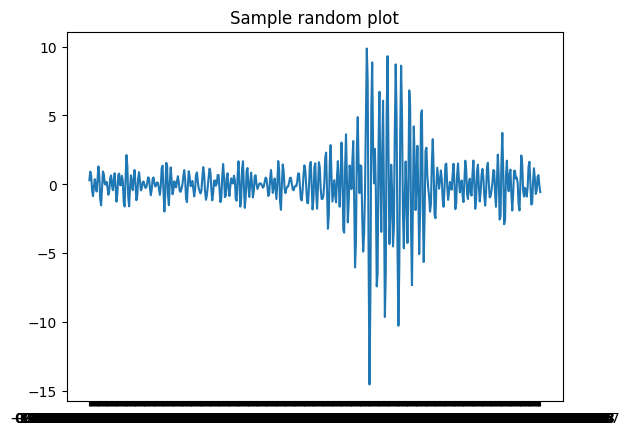

In [ ]:
def view_eeg_plot(idx):
    data = Raw_values.loc[idx]
    plt.plot(data)
    plt.title(f"Sample random plot")
    plt.show()


view_eeg_plot(7)

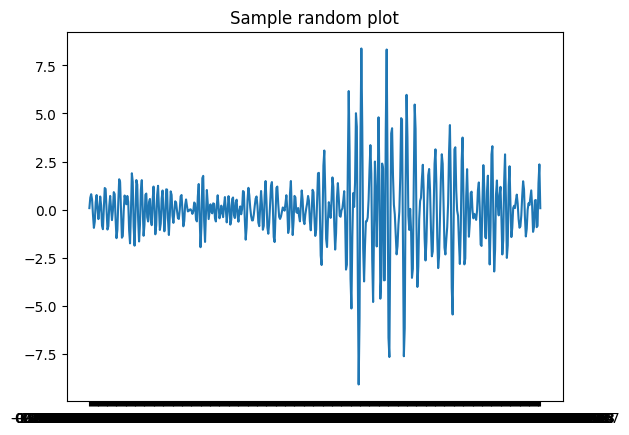

In [ ]:
view_eeg_plot(8)

In [ ]:
eeg.loc[1]

0.1591417356076602     4.172309
0.3849673029722303     3.013156
0.005971839412009     -0.631550
-0.3470221718242302   -2.039802
-0.016649750774715    -1.218886
                         ...   
-0.3143838041969989   -0.551244
-1.6541078061131598   -0.233042
-1.4001979338641886    0.615747
-0.0799294327108092   -0.768386
0                      0.000000
Name: 1, Length: 2001, dtype: float64

In [ ]:
Raw_values.shape

(16287, 500)

In [ ]:
scaler = preprocessing.MinMaxScaler()
series_list = [
    scaler.fit_transform(np.asarray(Raw_values))
]

labels_list = labels

In [ ]:
series_list = np.array(series_list)[0]
series_list.shape


(16287, 500)

In [ ]:
labels_list = np.array(labels_list)
labels_list.shape

(16287, 1)

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    series_list, labels_list, test_size=0.15, random_state=42, shuffle=True
)

print(
    f"Length of x_train : {len(x_train)}\nLength of x_test : {len(x_test)}\nLength of y_train : {len(y_train)}\nLength of y_test : {len(y_test)}"
)

x_train = np.asarray(x_train).astype(np.float32).reshape(-1, 500, 1)
y_train = np.asarray(y_train).astype(np.float32).reshape(-1, 1)
y_train = keras.utils.to_categorical(y_train)

x_test = np.asarray(x_test).astype(np.float32).reshape(-1, 500, 1)
y_test = np.asarray(y_test).astype(np.float32).reshape(-1, 1)
y_test = keras.utils.to_categorical(y_test)

Length of x_train : 13843
Length of x_test : 2444
Length of y_train : 13843
Length of y_test : 2444


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
def plot_history_metrics(history: keras.callbacks.History):
    total_plots = len(history.history)
    cols = total_plots // 2

    rows = total_plots // cols

    if total_plots % cols != 0:
        rows += 1

    pos = range(1, total_plots + 1)
    plt.figure(figsize=(15, 10))
    for i, (key, value) in enumerate(history.history.items()):
        plt.subplot(rows, cols, pos[i])
        plt.plot(range(len(value)), value)
        plt.title(str(key))
    plt.show()

In [ ]:
def create_model():
    input_layer = keras.Input(shape=(500, 1))

    x = layers.Conv1D(
        filters=32, kernel_size=3, strides=2, activation="relu", padding="same"
    )(input_layer)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=64, kernel_size=3, strides=2, activation="relu", padding="same"
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=128, kernel_size=5, strides=2, activation="relu", padding="same"
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=256, kernel_size=5, strides=2, activation="relu", padding="same"
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=512, kernel_size=7, strides=2, activation="relu", padding="same"
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=1024, kernel_size=7, strides=2, activation="relu", padding="same"
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Dropout(0.2)(x)

    x = layers.Flatten()(x)

    x = layers.Dense(4096, activation="relu")(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Dense(
        2048, activation="relu", kernel_regularizer=keras.regularizers.L2()
    )(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Dense(
        1024, activation="relu", kernel_regularizer=keras.regularizers.L2()
    )(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(
        128, activation="relu", kernel_regularizer=keras.regularizers.L2()
    )(x)
    output_layer = layers.Dense(2, activation="softmax")(x)

    return keras.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
conv_model = create_model()

print(conv_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 250, 32)           128       
                                                                 
 batch_normalization (Batch  (None, 250, 32)           128       
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 125, 64)           6208      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 64)           256       
 chNormalization)                                                
                                                                 
 conv1d_2 (Conv1D)           (None, 63, 128)           41088 

In [ ]:
epochs = 30

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_top_k_categorical_accuracy",
        factor=0.2,
        patience=2,
        min_lr=0.000001,
    ),
]

optimizer = keras.optimizers.Adam(amsgrad=True, learning_rate=0.001)
loss = keras.losses.CategoricalCrossentropy()

In [ ]:
conv_model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=[
        keras.metrics.TopKCategoricalAccuracy(k=3),
        keras.metrics.AUC(),
        keras.metrics.Precision(),
        keras.metrics.Recall(),
    ],
)

conv_model_history = conv_model.fit(
    train_dataset,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=test_dataset
)

Epoch 1/30
217/217 [==============================] - ETA: 0s - loss: 10.5811 - top_k_categorical_accuracy: 1.0000 - auc: 0.6795 - precision: 0.6295 - recall: 0.6295

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


217/217 [==============================] - 430s 2s/step - loss: 10.5811 - top_k_categorical_accuracy: 1.0000 - auc: 0.6795 - precision: 0.6295 - recall: 0.6295 - val_loss: 3.1876 - val_top_k_categorical_accuracy: 1.0000 - val_auc: 0.5186 - val_precision: 0.5000 - val_recall: 0.5000 - lr: 0.0010
Epoch 2/30
217/217 [==============================] - 424s 2s/step - loss: 1.9655 - top_k_categorical_accuracy: 1.0000 - auc: 0.7869 - precision: 0.7068 - recall: 0.7068 - val_loss: 1.7504 - val_top_k_categorical_accuracy: 1.0000 - val_auc: 0.5254 - val_precision: 0.4759 - val_recall: 0.4759 - lr: 0.0010
Epoch 3/30
217/217 [==============================] - 419s 2s/step - loss: 1.0578 - top_k_categorical_accuracy: 1.0000 - auc: 0.8115 - precision: 0.7282 - recall: 0.7282 - val_loss: 0.9777 - val_top_k_categorical_accuracy: 1.0000 - val_auc: 0.7574 - val_precision: 0.6669 - val_recall: 0.6669 - lr: 0.0010
Epoch 4/30
217/217 [==============================] - 423s 2s/step - loss: 0.8052 - top_k_ca

In [ ]:
y_pred = [np.argmax(conv_model.predict(x_test))]
y_pred = keras.utils.to_categorical(y_pred)

77/77 [==============================] - 8s 104ms/step


In [ ]:
predicty=list(map(lambda x: np.argmax(x),conv_model.predict(x_test,verbose=True)))
predicty = keras.utils.to_categorical(predicty)

77/77 [==============================] - 8s 99ms/step


In [ ]:
predicty[1],y_test[1]

(array([0., 1.], dtype=float32), array([0., 1.], dtype=float32))

In [ ]:
accuracy = np.mean(predicty == y_test)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 71.11%


In [ ]:
np.array(predicty).shape

(2444, 3)

In [ ]:
test_acc = conv_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

77/77 [==============================] - 8s 100ms/step - loss: 1.0024 - top_k_categorical_accuracy: 1.0000 - auc: 0.7970 - precision: 0.7111 - recall: 0.7111
Test accuracy: [1.0024126768112183, 1.0, 0.7970394492149353, 0.7111293077468872, 0.7111293077468872]


In [ ]:
conv_model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=[
        keras.metrics.BinaryAccuracy(),
        keras.metrics.AUC(),
        keras.metrics.Precision(),
        keras.metrics.Recall(),
    ],
)

conv_model_history = conv_model.fit(
    train_dataset,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=test_dataset
)

Epoch 1/30
217/217 [==============================] - ETA: 0s - loss: 0.5171 - binary_accuracy: 0.8827 - auc_1: 0.9570 - precision_1: 0.8827 - recall_1: 0.8827

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


217/217 [==============================] - 439s 2s/step - loss: 0.5171 - binary_accuracy: 0.8827 - auc_1: 0.9570 - precision_1: 0.8827 - recall_1: 0.8827 - val_loss: 1.0023 - val_binary_accuracy: 0.7115 - val_auc_1: 0.7971 - val_precision_1: 0.7115 - val_recall_1: 0.7115 - lr: 1.0000e-06
Epoch 2/30
217/217 [==============================] - ETA: 0s - loss: 0.5139 - binary_accuracy: 0.8833 - auc_1: 0.9580 - precision_1: 0.8833 - recall_1: 0.8833

217/217 [==============================] - 442s 2s/step - loss: 0.5139 - binary_accuracy: 0.8833 - auc_1: 0.9580 - precision_1: 0.8833 - recall_1: 0.8833 - val_loss: 1.0056 - val_binary_accuracy: 0.7115 - val_auc_1: 0.7972 - val_precision_1: 0.7115 - val_recall_1: 0.7115 - lr: 1.0000e-06
Epoch 3/30
217/217 [==============================] - ETA: 0s - loss: 0.5132 - binary_accuracy: 0.8868 - auc_1: 0.9582 - precision_1: 0.8868 - recall_1: 0.8868

217/217 [==============================] - 446s 2s/step - loss: 0.5132 - binary_accuracy: 0.8868 - auc_1: 0.9582 - precision_1: 0.8868 - recall_1: 0.8868 - val_loss: 1.0087 - val_binary_accuracy: 0.7107 - val_auc_1: 0.7970 - val_precision_1: 0.7107 - val_recall_1: 0.7107 - lr: 1.0000e-06
Epoch 4/30
217/217 [==============================] - ETA: 0s - loss: 0.5123 - binary_accuracy: 0.8869 - auc_1: 0.9584 - precision_1: 0.8869 - recall_1: 0.8869

217/217 [==============================] - 439s 2s/step - loss: 0.5123 - binary_accuracy: 0.8869 - auc_1: 0.9584 - precision_1: 0.8869 - recall_1: 0.8869 - val_loss: 1.0110 - val_binary_accuracy: 0.7103 - val_auc_1: 0.7966 - val_precision_1: 0.7103 - val_recall_1: 0.7103 - lr: 1.0000e-06
Epoch 5/30
217/217 [==============================] - ETA: 0s - loss: 0.5114 - binary_accuracy: 0.8856 - auc_1: 0.9587 - precision_1: 0.8856 - recall_1: 0.8856

217/217 [==============================] - 433s 2s/step - loss: 0.5114 - binary_accuracy: 0.8856 - auc_1: 0.9587 - precision_1: 0.8856 - recall_1: 0.8856 - val_loss: 1.0138 - val_binary_accuracy: 0.7099 - val_auc_1: 0.7965 - val_precision_1: 0.7099 - val_recall_1: 0.7099 - lr: 1.0000e-06
Epoch 6/30
217/217 [==============================] - ETA: 0s - loss: 0.5079 - binary_accuracy: 0.8879 - auc_1: 0.9598 - precision_1: 0.8879 - recall_1: 0.8879

217/217 [==============================] - 441s 2s/step - loss: 0.5079 - binary_accuracy: 0.8879 - auc_1: 0.9598 - precision_1: 0.8879 - recall_1: 0.8879 - val_loss: 1.0171 - val_binary_accuracy: 0.7091 - val_auc_1: 0.7962 - val_precision_1: 0.7091 - val_recall_1: 0.7091 - lr: 1.0000e-06
Epoch 7/30
217/217 [==============================] - ETA: 0s - loss: 0.5074 - binary_accuracy: 0.8901 - auc_1: 0.9599 - precision_1: 0.8901 - recall_1: 0.8901

217/217 [==============================] - 443s 2s/step - loss: 0.5074 - binary_accuracy: 0.8901 - auc_1: 0.9599 - precision_1: 0.8901 - recall_1: 0.8901 - val_loss: 1.0187 - val_binary_accuracy: 0.7103 - val_auc_1: 0.7964 - val_precision_1: 0.7103 - val_recall_1: 0.7103 - lr: 1.0000e-06
Epoch 8/30
217/217 [==============================] - ETA: 0s - loss: 0.5036 - binary_accuracy: 0.8926 - auc_1: 0.9611 - precision_1: 0.8926 - recall_1: 0.8926

217/217 [==============================] - 441s 2s/step - loss: 0.5036 - binary_accuracy: 0.8926 - auc_1: 0.9611 - precision_1: 0.8926 - recall_1: 0.8926 - val_loss: 1.0224 - val_binary_accuracy: 0.7095 - val_auc_1: 0.7961 - val_precision_1: 0.7095 - val_recall_1: 0.7095 - lr: 1.0000e-06
Epoch 9/30
217/217 [==============================] - ETA: 0s - loss: 0.5045 - binary_accuracy: 0.8885 - auc_1: 0.9607 - precision_1: 0.8885 - recall_1: 0.8885

217/217 [==============================] - 429s 2s/step - loss: 0.5045 - binary_accuracy: 0.8885 - auc_1: 0.9607 - precision_1: 0.8885 - recall_1: 0.8885 - val_loss: 1.0246 - val_binary_accuracy: 0.7103 - val_auc_1: 0.7964 - val_precision_1: 0.7103 - val_recall_1: 0.7103 - lr: 1.0000e-06
Epoch 10/30
217/217 [==============================] - ETA: 0s - loss: 0.5011 - binary_accuracy: 0.8937 - auc_1: 0.9618 - precision_1: 0.8937 - recall_1: 0.8937

217/217 [==============================] - 435s 2s/step - loss: 0.5011 - binary_accuracy: 0.8937 - auc_1: 0.9618 - precision_1: 0.8937 - recall_1: 0.8937 - val_loss: 1.0261 - val_binary_accuracy: 0.7099 - val_auc_1: 0.7963 - val_precision_1: 0.7099 - val_recall_1: 0.7099 - lr: 1.0000e-06
Epoch 11/30
217/217 [==============================] - ETA: 0s - loss: 0.5020 - binary_accuracy: 0.8911 - auc_1: 0.9614 - precision_1: 0.8911 - recall_1: 0.8911

217/217 [==============================] - 436s 2s/step - loss: 0.5020 - binary_accuracy: 0.8911 - auc_1: 0.9614 - precision_1: 0.8911 - recall_1: 0.8911 - val_loss: 1.0297 - val_binary_accuracy: 0.7083 - val_auc_1: 0.7957 - val_precision_1: 0.7083 - val_recall_1: 0.7083 - lr: 1.0000e-06
Epoch 12/30
217/217 [==============================] - ETA: 0s - loss: 0.5004 - binary_accuracy: 0.8916 - auc_1: 0.9619 - precision_1: 0.8916 - recall_1: 0.8916

217/217 [==============================] - 433s 2s/step - loss: 0.5004 - binary_accuracy: 0.8916 - auc_1: 0.9619 - precision_1: 0.8916 - recall_1: 0.8916 - val_loss: 1.0316 - val_binary_accuracy: 0.7099 - val_auc_1: 0.7960 - val_precision_1: 0.7099 - val_recall_1: 0.7099 - lr: 1.0000e-06
Epoch 13/30
217/217 [==============================] - ETA: 0s - loss: 0.4984 - binary_accuracy: 0.8949 - auc_1: 0.9626 - precision_1: 0.8949 - recall_1: 0.8949

217/217 [==============================] - 440s 2s/step - loss: 0.4984 - binary_accuracy: 0.8949 - auc_1: 0.9626 - precision_1: 0.8949 - recall_1: 0.8949 - val_loss: 1.0348 - val_binary_accuracy: 0.7087 - val_auc_1: 0.7952 - val_precision_1: 0.7087 - val_recall_1: 0.7087 - lr: 1.0000e-06
Epoch 14/30
217/217 [==============================] - ETA: 0s - loss: 0.4956 - binary_accuracy: 0.8965 - auc_1: 0.9633 - precision_1: 0.8965 - recall_1: 0.8965

217/217 [==============================] - 440s 2s/step - loss: 0.4956 - binary_accuracy: 0.8965 - auc_1: 0.9633 - precision_1: 0.8965 - recall_1: 0.8965 - val_loss: 1.0393 - val_binary_accuracy: 0.7087 - val_auc_1: 0.7946 - val_precision_1: 0.7087 - val_recall_1: 0.7087 - lr: 1.0000e-06
Epoch 15/30
217/217 [==============================] - ETA: 0s - loss: 0.4957 - binary_accuracy: 0.8960 - auc_1: 0.9632 - precision_1: 0.8960 - recall_1: 0.8960

217/217 [==============================] - 433s 2s/step - loss: 0.4957 - binary_accuracy: 0.8960 - auc_1: 0.9632 - precision_1: 0.8960 - recall_1: 0.8960 - val_loss: 1.0419 - val_binary_accuracy: 0.7107 - val_auc_1: 0.7944 - val_precision_1: 0.7107 - val_recall_1: 0.7107 - lr: 1.0000e-06
Epoch 16/30
217/217 [==============================] - ETA: 0s - loss: 0.4933 - binary_accuracy: 0.8945 - auc_1: 0.9640 - precision_1: 0.8945 - recall_1: 0.8945

217/217 [==============================] - 436s 2s/step - loss: 0.4933 - binary_accuracy: 0.8945 - auc_1: 0.9640 - precision_1: 0.8945 - recall_1: 0.8945 - val_loss: 1.0475 - val_binary_accuracy: 0.7087 - val_auc_1: 0.7938 - val_precision_1: 0.7087 - val_recall_1: 0.7087 - lr: 1.0000e-06
Epoch 17/30
217/217 [==============================] - ETA: 0s - loss: 0.4921 - binary_accuracy: 0.8965 - auc_1: 0.9642 - precision_1: 0.8965 - recall_1: 0.8965

217/217 [==============================] - 436s 2s/step - loss: 0.4921 - binary_accuracy: 0.8965 - auc_1: 0.9642 - precision_1: 0.8965 - recall_1: 0.8965 - val_loss: 1.0480 - val_binary_accuracy: 0.7107 - val_auc_1: 0.7946 - val_precision_1: 0.7107 - val_recall_1: 0.7107 - lr: 1.0000e-06
Epoch 18/30
217/217 [==============================] - ETA: 0s - loss: 0.4908 - binary_accuracy: 0.8961 - auc_1: 0.9645 - precision_1: 0.8961 - recall_1: 0.8961

217/217 [==============================] - 440s 2s/step - loss: 0.4908 - binary_accuracy: 0.8961 - auc_1: 0.9645 - precision_1: 0.8961 - recall_1: 0.8961 - val_loss: 1.0492 - val_binary_accuracy: 0.7107 - val_auc_1: 0.7949 - val_precision_1: 0.7107 - val_recall_1: 0.7107 - lr: 1.0000e-06
Epoch 19/30
217/217 [==============================] - ETA: 0s - loss: 0.4891 - binary_accuracy: 0.9004 - auc_1: 0.9650 - precision_1: 0.9004 - recall_1: 0.9004

217/217 [==============================] - 437s 2s/step - loss: 0.4891 - binary_accuracy: 0.9004 - auc_1: 0.9650 - precision_1: 0.9004 - recall_1: 0.9004 - val_loss: 1.0541 - val_binary_accuracy: 0.7099 - val_auc_1: 0.7942 - val_precision_1: 0.7099 - val_recall_1: 0.7099 - lr: 1.0000e-06
Epoch 20/30
 73/217 [=========>....................] - ETA: 4:36 - loss: 0.5103 - binary_accuracy: 0.8902 - auc_1: 0.9581 - precision_1: 0.8902 - recall_1: 0.8902